In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
from plottable import Table, ColumnDefinition
from plottable.formatters import decimal_to_percent

In [116]:
url = "https://fbref.com/en/comps/11/Serie-A-Stats"
html = requests.get(url).content
soup = BeautifulSoup(html, 'html.parser')

In [117]:
table_head = []

for tr in soup.find("table", id="results2023-2024111_overall").find_all("tr")[:1]:
    table_head.append([th.text for th in tr.find_all('th')])

In [118]:
table = soup.find('table', id="results2023-2024111_overall")
table_rows = table.find_all('tr')

In [119]:
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
pd.DataFrame(l[1:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Inter,13,10,2,1,30,7,+23,32,2.46,25.5,8.8,+16.7,+1.28,W W W W D,"10,796",Lautaro Martínez - 13,Yann Sommer,
1,Juventus,13,9,3,1,20,8,+12,30,2.31,20.2,8.6,+11.7,+0.90,W W W W D,,Dušan Vlahović - 5,Wojciech Szczęsny,
2,Milan,13,8,2,3,21,14,+7,26,2.00,18.5,15.2,+3.3,+0.25,L D L D W,"12,179",Olivier Giroud - 7,Mike Maignan,
3,Napoli,13,7,3,3,26,14,+12,24,1.85,25.0,11.3,+13.7,+1.05,W D W L W,,Victor Osimhen - 6,Alex Meret,
4,Roma,13,6,3,4,25,15,+10,21,1.62,18.0,11.7,+6.3,+0.49,W L W D W,"18,116",Romelu Lukaku - 6,Rui Patrício,
5,Bologna,13,5,6,2,15,10,+5,21,1.62,15.5,11.8,+3.8,+0.29,W D W L W,,Joshua Zirkzee - 5,Łukasz Skorupski,
6,Atalanta,13,6,2,5,21,13,+8,20,1.54,15.7,11.7,+4.0,+0.31,W W L D L,,Gianluca Scamacca - 5,Juan Musso,
7,Fiorentina,13,6,2,5,20,17,+3,20,1.54,14.5,18.0,-3.6,-0.27,L L L W L,"7,191",Nicolás González - 6,Pietro Terracciano,
8,Monza,13,4,6,3,14,12,+2,18,1.38,15.1,15.8,-0.7,-0.05,L D W D D,,Andrea Colpani - 6,Michele Di Gregorio,
9,Frosinone,13,5,3,5,19,21,-2,18,1.38,15.5,20.6,-5.2,-0.40,L L W L W,,Matìas Soulé - 6,Stefano Turati,


In [29]:
# https://pandas.pydata.org/docs/reference/api/pandas.read_html.html

df = pd.read_html('https://fbref.com/en/comps/11/Serie-A-Stats')

In [14]:
pd.set_option("display.max.columns", None)

In [15]:
df[0]

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Inter,13,10,2,1,30,7,23,32,2.46,25.5,8.8,16.7,1.28,W W W W D,10796.0,Lautaro Martínez - 13,Yann Sommer,NaN
1,2,Juventus,13,9,3,1,20,8,12,30,2.31,20.2,8.6,11.7,0.90,W W W W D,NaN,Dušan Vlahović - 5,Wojciech Szczęsny,NaN
2,3,Milan,13,8,2,3,21,14,7,26,2.00,18.5,15.2,3.3,0.25,L D L D W,12179.0,Olivier Giroud - 7,Mike Maignan,NaN
3,4,Napoli,13,7,3,3,26,14,12,24,1.85,25.0,11.3,13.7,1.05,W D W L W,NaN,Victor Osimhen - 6,Alex Meret,NaN
4,5,Roma,13,6,3,4,25,15,10,21,1.62,18.0,11.7,6.3,0.49,W L W D W,18116.0,Romelu Lukaku - 6,Rui Patrício,NaN
5,6,Bologna,13,5,6,2,15,10,5,21,1.62,15.5,11.7,3.8,0.29,W D W L W,NaN,Joshua Zirkzee - 5,Łukasz Skorupski,NaN
6,7,Atalanta,13,6,2,5,21,13,8,20,1.54,15.7,11.7,4.0,0.31,W W L D L,NaN,Gianluca Scamacca - 5,Juan Musso,NaN
7,8,Fiorentina,13,6,2,5,20,17,3,20,1.54,14.5,18.0,-3.6,-0.27,L L L W L,7191.0,Nicolás González - 6,Pietro Terracciano,NaN
8,9,Monza,13,4,6,3,14,12,2,18,1.38,15.1,15.8,-0.7,-0.05,L D W D D,NaN,Andrea Colpani - 6,Michele Di Gregorio,NaN
9,10,Frosinone,13,5,3,5,19,21,-2,18,1.38,15.5,20.6,-5.2,-0.40,L L W L W,NaN,Matìas Soulé - 6,Stefano Turati,NaN


In [5]:
df[1]

Unnamed: 0_level_0 Unnamed: 1_level_0 Home                                  \
                   Rk              Squad   MP  W  D  L  GF  GA  GD Pts Pts/MP   
0                   1              Inter    7  5  1  1  17   5  12  16   2.29   
1                   2           Juventus    7  5  2  0  11   4   7  17   2.43   
2                   3              Milan    6  4  0  2   8   3   5  12   2.00   
3                   4             Napoli    6  2  1  3  10   9   1   7   1.17   
4                   5               Roma    7  5  1  1  18   6  12  16   2.29   
5                   6            Bologna    7  5  1  1  10   4   6  16   2.29   
6                   7           Atalanta    6  3  1  2   9   4   5  10   1.67   
7                   8         Fiorentina    6  3  1  2  10   8   2  10   1.67   
8                   9              Monza    6  2  4  0   8   3   5  10   1.67   
9                  10          Frosinone    7  5  1  1  14  10   4  16   2.29   
10                 11              Lazio    6  3  2  1   7   4   3  11   1.83   
11                 12             Torino    6  2  3  1   4   5  -1   9   1.50   
12                 13              Lecce    7  3  2  2   8   9  -1  11   1.57   
13                 14           Sassuolo    7  2  2  3  10  11  -1   8   1.14   
14                 15              Genoa    6  3  1  2   9   8   1  10   1.67   
15                 16            Udinese    6  0  4  2   4   9  -5   4   0.67   
16                 17           Cagliari    7  2  2  3   9  14  -5   8   1.14   
17                 18             Empoli    7  1  1  5   4  11  -7   4   0.57   
18                 19      Hellas Verona    6  1  2  3   6  10  -4   5   0.83   
19                 20        Salernitana    7  1  3  3   6  14  -8   6   0.86   

                            Away                                              \
      xG   xGA   xGD xGD/90   MP  W  D  L  GF  GA  GD Pts Pts/MP    xG   xGA   
0   15.9   5.3  10.5   1.51    6  5  1  0  13   2  11  16   2.67   9.6   3.4   
1   12.3   3.4   8.9   1.27    6  4  1  1   9   4   5  13   2.17   7.9   5.1   
2    9.2   6.3   2.8   0.47    7  4  2  1  13  11   2  14   2.00   9.4   8.9   
3   12.4   6.0   6.3   1.06    7  5  2  0  16   5  11  17   2.43  12.6   5.3   
4   10.5   4.6   5.9   0.85    6  1  2  3   7   9  -2   5   0.83   7.5   7.1   
5    9.5   6.7   2.8   0.41    6  0  5  1   5   6  -1   5   0.83   5.9   5.0   
6    7.5   5.5   1.9   0.32    7  3  1  3  12   9   3  10   1.43   8.2   6.2   
7    6.8   5.7   1.1   0.19    7  3  1  3  10   9   1  10   1.43   7.6  12.3   
8    9.2   5.1   4.1   0.68    7  2  2  3   6   9  -3   8   1.14   5.9  10.7   
9    8.4   9.5  -1.1  -0.16    6  0  2  4   5  11  -6   2   0.33   7.1  11.1   
10   7.3   3.9   3.3   0.56    7  2  0  5   7  11  -4   6   0.86   8.0   9.9   
11   6.7   5.2   1.5   0.25    7  2  1  4   6  11  -5   7   1.00   5.2   9.4   
12   8.1   8.8  -0.8  -0.11    6  0  4  2   7   9  -2   4   0.67   3.9  10.7   
13   9.5   8.8   0.7   0.10    6  2  1  3  10  13  -3   7   1.17   6.7  13.8   
14   5.1   4.8   0.3   0.05    7  1  1  5   5  10  -5   4   0.57   5.2   6.8   
15   9.7   6.4   3.3   0.54    7  1  4  2   5   9  -4   7   1.00   6.0   9.4   
16  10.6   9.6   1.0   0.14    6  0  2  4   4  11  -7   2   0.33   4.6  10.0   
17   7.6  10.1  -2.5  -0.36    6  2  0  4   4  14 -10   6   1.00   5.5   9.5   
18   5.7   7.6  -1.9  -0.32    7  1  1  5   3   8  -5   4   0.57   3.4  10.6   
19   6.5  10.7  -4.2  -0.60    6  0  2  4   4  11  -7   2   0.33   3.9  13.1   

                
    xGD xGD/90  
0   6.1   1.02  
1   2.7   0.46  
2   0.5   0.07  
3   7.3   1.05  
4   0.4   0.07  
5   0.9   0.15  
6   2.1   0.29  
7  -4.7  -0.67  
8  -4.8  -0.68  
9  -4.0  -0.67  
10 -1.9  -0.27  
11 -4.2  -0.60  
12 -6.9  -1.15  
13 -7.1  -1.19  
14 -1.7  -0.24  
15 -3.4  -0.48  
16 -5.3  -0.89  
17 -3.9  -0.65  
18 -7.2  -1.02  
19 -9.2  -1.53

In [28]:
df[0]

,Rk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
Squad,,,,,,,,,,,,,,,,,,,
Inter,1,13,10,2,1,30,7,23,32,2.46,25.5,8.8,16.7,1.28,W W W W D,10796.0,Lautaro Martínez - 13,Yann Sommer,NaN
Juventus,2,13,9,3,1,20,8,12,30,2.31,20.2,8.6,11.7,0.90,W W W W D,NaN,Dušan Vlahović - 5,Wojciech Szczęsny,NaN
Milan,3,13,8,2,3,21,14,7,26,2.00,18.5,15.2,3.3,0.25,L D L D W,12179.0,Olivier Giroud - 7,Mike Maignan,NaN
Napoli,4,13,7,3,3,26,14,12,24,1.85,25.0,11.3,13.7,1.05,W D W L W,NaN,Victor Osimhen - 6,Alex Meret,NaN
Roma,5,13,6,3,4,25,15,10,21,1.62,18.0,11.7,6.3,0.49,W L W D W,18116.0,Romelu Lukaku - 6,Rui Patrício,NaN
Bologna,6,13,5,6,2,15,10,5,21,1.62,15.5,11.7,3.8,0.29,W D W L W,NaN,Joshua Zirkzee - 5,Łukasz Skorupski,NaN
Atalanta,7,13,6,2,5,21,13,8,20,1.54,15.7,11.7,4.0,0.31,W W L D L,NaN,Gianluca Scamacca - 5,Juan Musso,NaN
Fiorentina,8,13,6,2,5,20,17,3,20,1.54,14.5,18.0,-3.6,-0.27,L L L W L,7191.0,Nicolás González - 6,Pietro Terracciano,NaN
Monza,9,13,4,6,3,14,12,2,18,1.38,15.1,15.8,-0.7,-0.05,L D W D D,NaN,Andrea Colpani - 6,Michele Di Gregorio,NaN


In [31]:
#df[0] = df[0].set_index("Squad")
df[0] = df[0][['Squad', 'MP', 'Pts', 'Pts/MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'xG', 'xGA', 'xGD', 'xGD/90']]
df[0] = df[0].set_index("Squad")

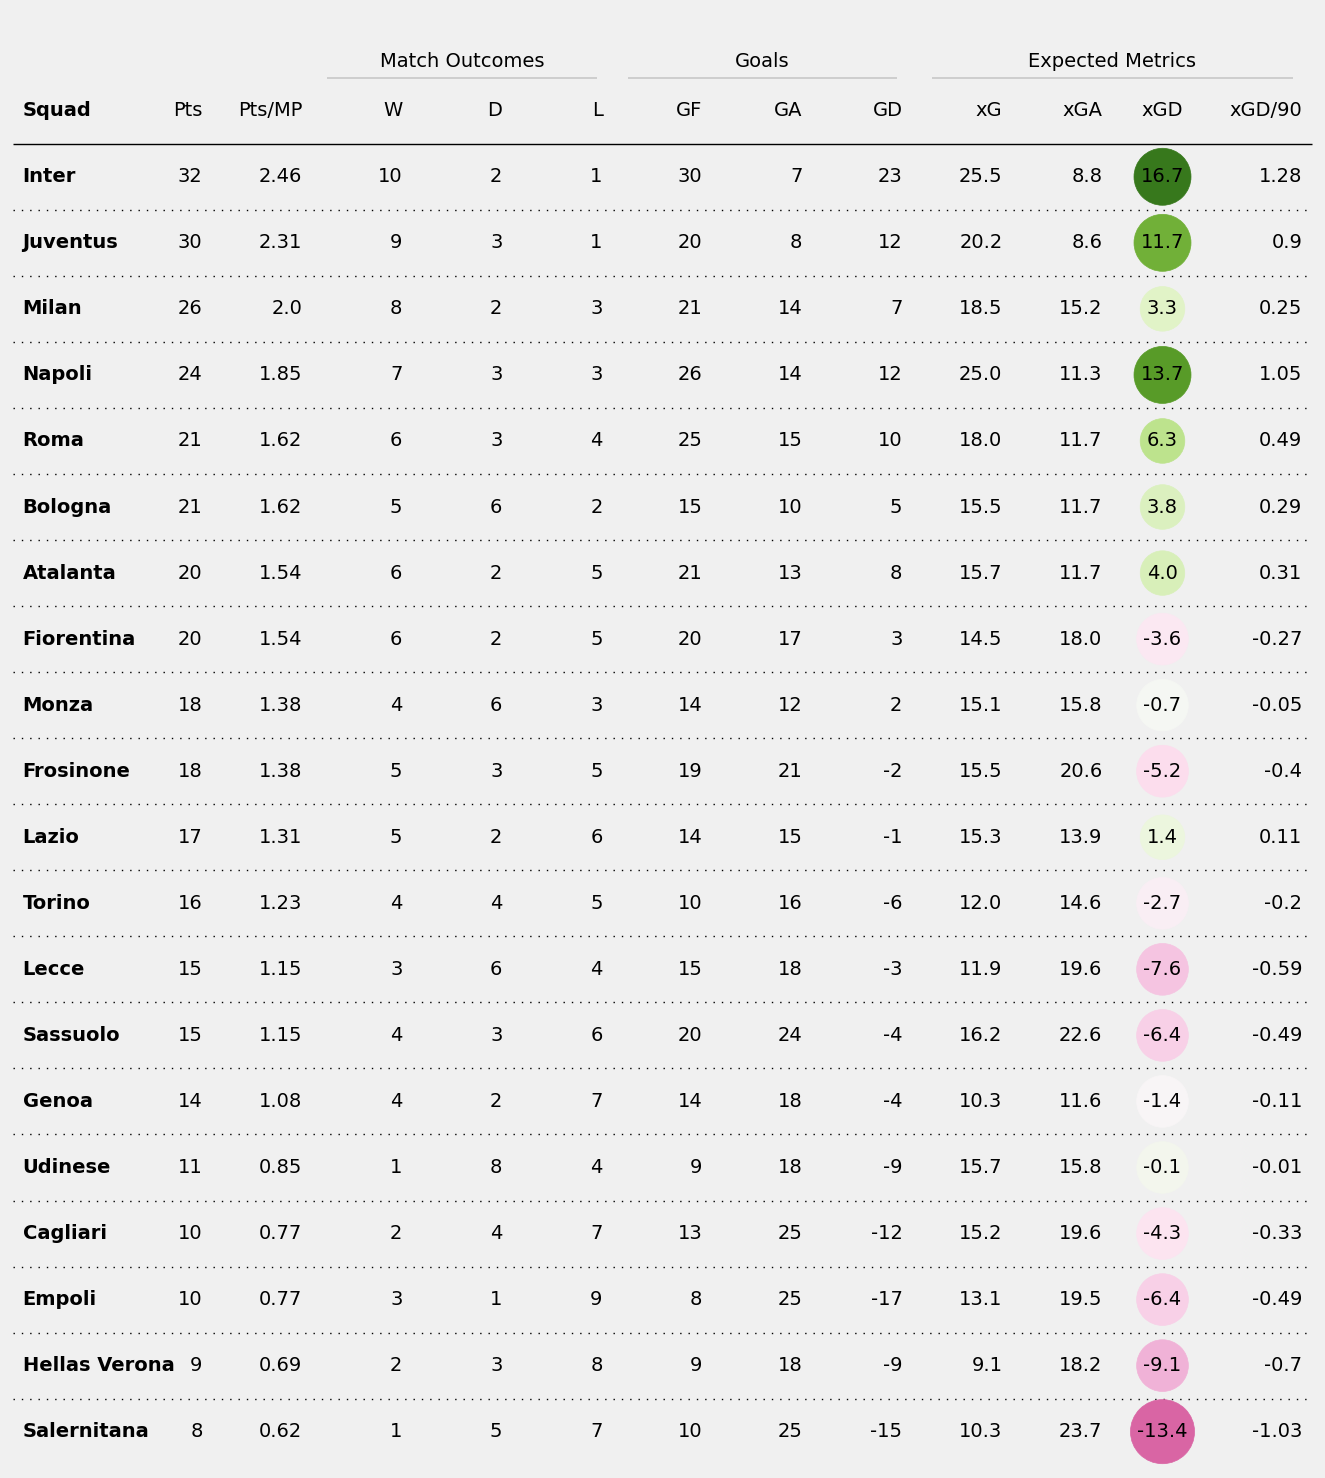

In [43]:
from matplotlib.colors import LinearSegmentedColormap
from plottable.cmap import normed_cmap
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 18))

cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)

tab = Table(
    df[0].iloc[:,1:14],
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
    column_definitions=[
        ColumnDefinition(name='Squad', textprops={"ha": "left", "weight": "bold"}),
        ColumnDefinition(name="W", group="Match Outcomes"),
        ColumnDefinition(name="D", group="Match Outcomes"),
        ColumnDefinition(name="L", group="Match Outcomes"),
        ColumnDefinition(name="GF", group="Goals"),
        ColumnDefinition(name="GA", group="Goals"),
        ColumnDefinition(name='GD', group="Goals"),#, cmap=plt.cm.Reds),
        ColumnDefinition(name="xG", group="Expected Metrics"),
        ColumnDefinition(name="xGA", group="Expected Metrics"),
        ColumnDefinition(name="xGD", group="Expected Metrics",
                textprops={
                    "ha": "center",
                    "bbox": {"boxstyle": "circle", "pad": 0.35}},
                cmap=normed_cmap(df[0]["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2.5)
        ),
        ColumnDefinition(name="xGD/90", group="Expected Metrics")
    ]
)

#fig, ax = plt.subplots(figsize=(6, 5))

plt.show()

In [44]:
# showing only certain columns, i.e. from 1 to 14
df[0].iloc[:,1:15]

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
index,,,,,,,,,,,,,,
0,Inter,12,10,1,1,29,6,23,31,2.58,24.6,8.3,16.3,1.35
1,Juventus,12,9,2,1,19,7,12,29,2.42,19.8,7.7,12.1,1.01
2,Milan,13,8,2,3,21,14,7,26,2.00,18.4,15.2,3.2,0.24
3,Napoli,13,7,3,3,26,14,12,24,1.85,24.7,11.3,13.4,1.03
4,Atalanta,13,6,2,5,21,13,8,20,1.54,15.7,11.4,4.2,0.33
5,Fiorentina,13,6,2,5,20,17,3,20,1.54,14.4,17.9,-3.4,-0.26
6,Roma,12,5,3,4,22,14,8,18,1.50,16.6,11.2,5.5,0.46
7,Bologna,12,4,6,2,13,10,3,18,1.50,14.0,11.3,2.7,0.22
8,Monza,12,4,5,3,13,11,2,17,1.42,14.4,14.2,0.2,0.01


In [61]:
df_passes = pd.read_html('https://fbref.com/en/comps/11/Serie-A-Stats', attrs={'id':'stats_squads_passing_types_for'})
df_passes[0]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Squad               # Pl                90s   
0            Atalanta                 25               13.0   
1             Bologna                 24               12.0   
2            Cagliari                 25               12.0   
3              Empoli                 29               12.0   
4          Fiorentina                 26               13.0   
5           Frosinone                 27               12.0   
6               Genoa                 27               12.0   
7       Hellas Verona                 24               12.0   
8               Inter                 23               12.0   
9            Juventus                 24               12.0   
10              Lazio                 21               13.0   
11              Lecce                 23               12.0   
12              Milan                 26               13.0   
13              Monza                 25               12.0   
14             Napoli                 23               13.0   
15               Roma                 23               12.0   
16        Salernitana                 26               13.0   
17           Sassuolo                 26               12.0   
18             Torino                 23               12.0   
19            Udinese                 25               12.0   

   Unnamed: 3_level_0 Pass Types                                 Corner Kicks  \
                  Att       Live Dead   FK  TB  Sw  Crs   TI  CK           In   
0                7116       6486  601  138  14  53  252  280  76           29   
1                6620       6043  561  161   9  43  157  233  44           21   
2                4926       4345  560  130  15  62  247  239  44           17   
3                4959       4299  630  165  13  20  200  272  51           17   
4                7077       6417  641  188  19  67  257  292  69           18   
5                5841       5221  596  141  11  21  152  243  61           17   
6                4656       4062  580  177   8  24  154  227  32            9   
7                4892       4305  569  154   9  55  204  237  36            9   
8                6665       6111  539  144  22  64  263  234  67           29   
9                5747       5186  537  141  15  46  213  200  62           19   
10               7259       6649  589  164  14  31  204  240  64           23   
11               5075       4432  628  181   9  33  201  269  43           15   
12               6947       6362  570  169  16  27  209  213  54           26   
13               6566       6009  540  141   9  51  206  208  67           11   
14               7582       6944  608  171  14  72  232  260  87           27   
15               6303       5735  549  133   6  37  215  245  58           30   
16               5457       4770  660  187  12  43  187  270  54           12   
17               5489       4862  617  158  14  55  202  232  73           36   
18               5782       5256  509  129   5  36  229  217  49           35   
19               4615       4045  556  154  14  42  210  217  64           23   

           Outcomes             
   Out Str      Cmp Off Blocks  
0   27   1     5749  29    134  
1   17   0     5575  16    133  
2   22   0     3710  21    109  
3   21   0     3767  30    118  
4   29   1     5754  19    153  
5   23   0     4702  24    108  
6   20   0     3465  14     92  
7   24   0     3656  18     88  
8   26   0     5561  15    104  
9   27   0     4683  24     92  
10  35   0     6073  21    138  
11   8   0     3975  15     94  
12  18   0     5855  15    102  
13  43   0     5566  17    114  
14  38   2     6431  30    113  
15  23   0     5153  19     99  
16  14   0     4107  27    135  
17  16   1     4363  10     94  
18  10   0     4618  17     96  
19  30   0     3529  14     74